# PersonalityGroup

## Importing and setting up the Dataset

In [13]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import *
from sklearn.cluster import DBSCAN

In [14]:
traits_survey_complete = pd.read_csv('/content/data-final.csv', sep='\t')
traits_survey = traits_survey_complete.sample(80000)
traits_survey.head()

EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
519990   1.0   1.0   3.0  ...       US                  38.0                  -97.0
222545   3.0   3.0   5.0  ...       US               40.8451               -73.8802
904847   3.0   3.0   4.0  ...       US               40.4439               -79.9561
576613   1.0   2.0   3.0  ...       GB                  51.5                  -0.13
885608   1.0   3.0   1.0  ...       US               29.3951               -98.5955

[5 rows x 110 columns]

In [15]:
traits_survey = traits_survey.reset_index()
traits_survey.drop(columns=['index'], inplace=True)
print(traits_survey.shape)
traits_survey.head()

(80000, 110)


EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
0   1.0   1.0   3.0  ...       US                  38.0                  -97.0
1   3.0   3.0   5.0  ...       US               40.8451               -73.8802
2   3.0   3.0   4.0  ...       US               40.4439               -79.9561
3   1.0   2.0   3.0  ...       GB                  51.5                  -0.13
4   1.0   3.0   1.0  ...       US               29.3951               -98.5955

[5 rows x 110 columns]

## Exploratory Data Analysis

In [ ]:
traits_survey.dtypes

EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object

In [ ]:
number_traits_questions = traits_survey.columns.get_loc('OPN10')
number_traits_questions

49

In [ ]:
pers_traits_questions = traits_survey.columns[: number_traits_questions + 1]
pers_traits_questions

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [ ]:
for col in pers_traits_questions:
    print(traits_survey[col].value_counts())

3.0    22880
1.0    19671
2.0    15759
4.0    15023
5.0     6218
0.0      296
Name: EXT1, dtype: int64
3.0    19366
2.0    18499
1.0    16522
4.0    14996
5.0     9998
0.0      466
Name: EXT2, dtype: int64
4.0    22603
3.0    21233
2.0    15042
5.0    14448
1.0     6036
0.0      485
Name: EXT3, dtype: int64
3.0    22218
4.0    20208
2.0    16559
5.0    12430
1.0     7888
0.0      544
Name: EXT4, dtype: int64
4.0    23632
3.0    18532
5.0    15246
2.0    13995
1.0     7658
0.0      784
Name: EXT5, dtype: int64
2.0    26470
1.0    21150
3.0    15150
4.0    10928
5.0     5657
0.0      492
Name: EXT6, dtype: int64
1.0    18374
2.0    17998
3.0    15694
4.0    15400
5.0    11747
0.0      634
Name: EXT7, dtype: int64
4.0    21745
5.0    19317
3.0    18261
2.0    13881
1.0     6134
0.0      509
Name: EXT8, dtype: int64
4.0    19339
2.0    17346
3.0    16987
1.0    13492
5.0    12156
0.0      527
Name: EXT9, dtype: int64
5.0    24622
4.0    21163
3.0    15093
2.0    12488
1.0     5979
0.0     

The first 50 columns of traits_survey corresponds to the questions made according to the Big Five Personality Traits, so their values (responses) are 0., 1., 2., 3., 4. or 5., given that the answers were asked for in that scale.

In [ ]:
traits_questions_data = traits_survey[pers_traits_questions]
traits_questions_data.describe()

EXT1          EXT2  ...          OPN9         OPN10
count  79847.000000  79847.000000  ...  79847.000000  79847.000000
mean       2.642692      2.775208  ...      4.124288      3.959485
std        1.260221      1.322893  ...      1.038404      1.034497
min        0.000000      0.000000  ...      0.000000      0.000000
25%        1.000000      2.000000  ...      4.000000      3.000000
50%        3.000000      3.000000  ...      4.000000      4.000000
75%        4.000000      4.000000  ...      5.000000      5.000000
max        5.000000      5.000000  ...      5.000000      5.000000

[8 rows x 50 columns]

The following 50 columns correspond to the time lapses it took for each person to answer.

In [ ]:
times_per_questions = traits_survey[traits_survey.columns[
number_traits_questions + 1: traits_survey.columns.get_loc('OPN10_E') + 1]]
times_per_questions

EXT1_E  EXT2_E   EXT3_E  EXT4_E  ...   OPN7_E  OPN8_E  OPN9_E  OPN10_E
0      53122.0  5006.0   2402.0  2667.0  ...   2014.0  1549.0  2219.0   1050.0
1       3233.0  2490.0   5419.0  7879.0  ...   2479.0  4055.0  2836.0   2693.0
2      11656.0  8158.0   2548.0  8501.0  ...   3704.0  2658.0  5872.0  12656.0
3       2474.0  5539.0   2695.0  3220.0  ...   1422.0  3640.0  2124.0   1757.0
4      18927.0  1130.0  10143.0  1137.0  ...   4312.0  6974.0  3546.0  13557.0
...        ...     ...      ...     ...  ...      ...     ...     ...      ...
79995   9460.0  3593.0   2426.0  2441.0  ...   2441.0  8132.0  3146.0   2439.0
79996  10814.0  2054.0   3728.0  3207.0  ...   1669.0  2789.0  3246.0   1363.0
79997    868.0  3010.0    743.0  3003.0  ...   3134.0  4074.0  3219.0   2506.0
79998  17401.0  4974.0   1919.0  5046.0  ...   5434.0  2599.0  3836.0   2703.0
79999  13414.0  3535.0   3284.0  2949.0  ...  21854.0  4318.0  3266.0  41990.0

[80000 rows x 50 columns]

In [ ]:
times_per_questions.describe()

EXT1_E        EXT2_E  ...        OPN9_E       OPN10_E
count  7.984700e+04  7.984700e+04  ...  7.984700e+04  7.984700e+04
mean   7.317036e+04  7.068898e+03  ...  5.249253e+03  5.929313e+03
std    2.408408e+06  2.903223e+05  ...  6.681759e+04  4.256829e+05
min   -3.164500e+04  0.000000e+00  ...  0.000000e+00 -8.880000e+02
25%    4.814500e+03  2.385000e+03  ...  2.322000e+03  1.478000e+03
50%    7.373000e+03  3.413000e+03  ...  3.266000e+03  2.189000e+03
75%    1.239100e+04  5.063000e+03  ...  4.783000e+03  3.346500e+03
max    3.405388e+08  6.593412e+07  ...  1.386454e+07  8.642486e+07

[8 rows x 50 columns]

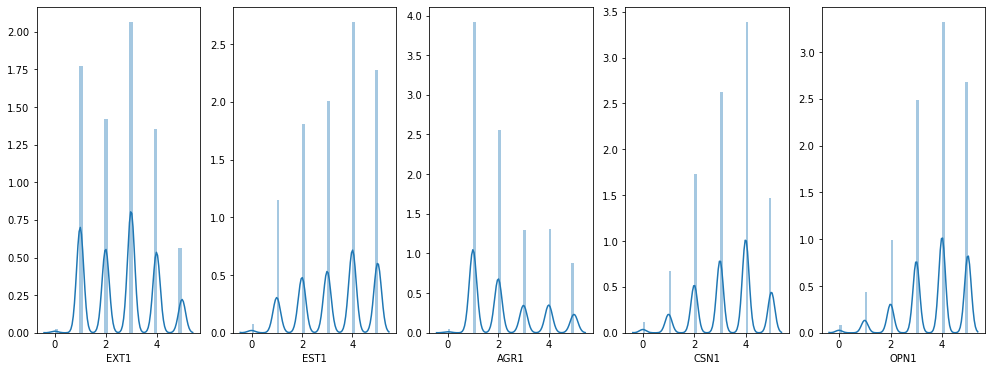

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (17, 6))
sns.distplot(traits_survey['EXT1'], ax=ax[0])
sns.distplot(traits_survey['EST1'],ax=ax[1])
sns.distplot(traits_survey['AGR1'], ax=ax[2])
sns.distplot(traits_survey['CSN1'], ax=ax[3])
sns.distplot(traits_survey['OPN1'], ax=ax[4])
plt.show()

In [ ]:
times_per_questions['EXT1_E'].value_counts()

0.0         700
4327.0       19
4921.0       19
6616.0       18
5840.0       18
           ... 
25353.0       1
178577.0      1
13209.0       1
714290.0      1
61387.0       1
Name: EXT1_E, Length: 25746, dtype: int64

In [ ]:
int_data = np.array(np.where(traits_survey.dtypes == int)).flatten()
traits_survey.iloc[:,int_data]

endelapse  IPC
0              6    2
1             25   70
2             19    1
3              6    1
4             55  130
...          ...  ...
79995          4    1
79996         14    1
79997         12    1
79998         15    1
79999         13    1

[80000 rows x 2 columns]

In [ ]:
traits_survey['endelapse'] = traits_survey['endelapse'].astype('float')
traits_survey['IPC'] = traits_survey['IPC'].astype('float')

In [ ]:
'''numeric_data = np.array(np.where(traits_survey.dtypes == float)).flatten()
numeric_data'''

'numeric_data = np.array(np.where(traits_survey.dtypes == float)).flatten()\nnumeric_data'

In [ ]:
f_cols = []
for i in range(traits_survey.shape[1]):
    if pd.DataFrame(traits_survey.dtypes).reset_index()[0][i] == 'float':
        f_cols.append(pd.DataFrame(traits_survey.dtypes).reset_index()['index'][i])
f_cols

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'EXT1_E',
 'EXT2_E',
 'EXT3_E',
 'EXT4_E',
 'EXT5_E',
 'EXT6_E',
 'EXT7_E',
 'EXT8_E',
 'EXT9_E',
 'EXT10_E',
 'EST1_E',
 'EST2_E',
 'EST3_E',
 'EST4_E',
 'EST5_E',
 'EST6_E',
 'EST7_E',
 'EST8_E',
 'EST9_E',
 'EST10_E',
 'AGR1_E',
 'AGR2_E',
 'AGR3_E',
 'AGR4_E',
 'AGR5_E',
 'AGR6_E',
 'AGR7_E',
 'AGR8_E',
 'AGR9_E',
 'AGR10_E',
 'CSN1_E',
 'CSN2_E',
 'CSN3_E',
 'CSN4_E',
 'CSN5_E',
 'CSN6_E',
 'CSN7_E',
 'CSN8_E',
 'CSN9_E',
 'CSN10_E',
 'OPN1_E',
 'OPN2_E',
 'OPN3_E',
 'OPN4_E',
 'OPN5_E',
 'OPN6_E',
 'OPN7_E',
 'OPN8_E',
 'OPN9_E',
 '

In [ ]:
numeric_data = traits_survey[f_cols]
numeric_data.corr()

EXT1      EXT2      EXT3  ...  testelapse  endelapse       IPC
EXT1         1.000000 -0.443231  0.466314  ...    0.007204   0.002914  0.061380
EXT2        -0.443231  1.000000 -0.410476  ...   -0.004753  -0.003277 -0.022871
EXT3         0.466314 -0.410476  1.000000  ...    0.007005   0.005295  0.052488
EXT4        -0.491484  0.554985 -0.431679  ...   -0.001213  -0.007180 -0.034273
EXT5         0.478597 -0.495743  0.553703  ...    0.004226   0.005011  0.030133
...               ...       ...       ...  ...         ...        ...       ...
screenh     -0.007739  0.005772  0.014530  ...   -0.008406  -0.002003 -0.007460
introelapse  0.005493 -0.006834  0.001746  ...    0.194759   0.024746 -0.004296
testelapse   0.007204 -0.004753  0.007005  ...    1.000000   0.054882 -0.001872
endelapse    0.002914 -0.003277  0.005295  ...    0.054882   1.000000  0.003766
IPC          0.061380 -0.022871  0.052488  ...   -0.001872   0.003766  1.000000

[106 rows x 106 columns]

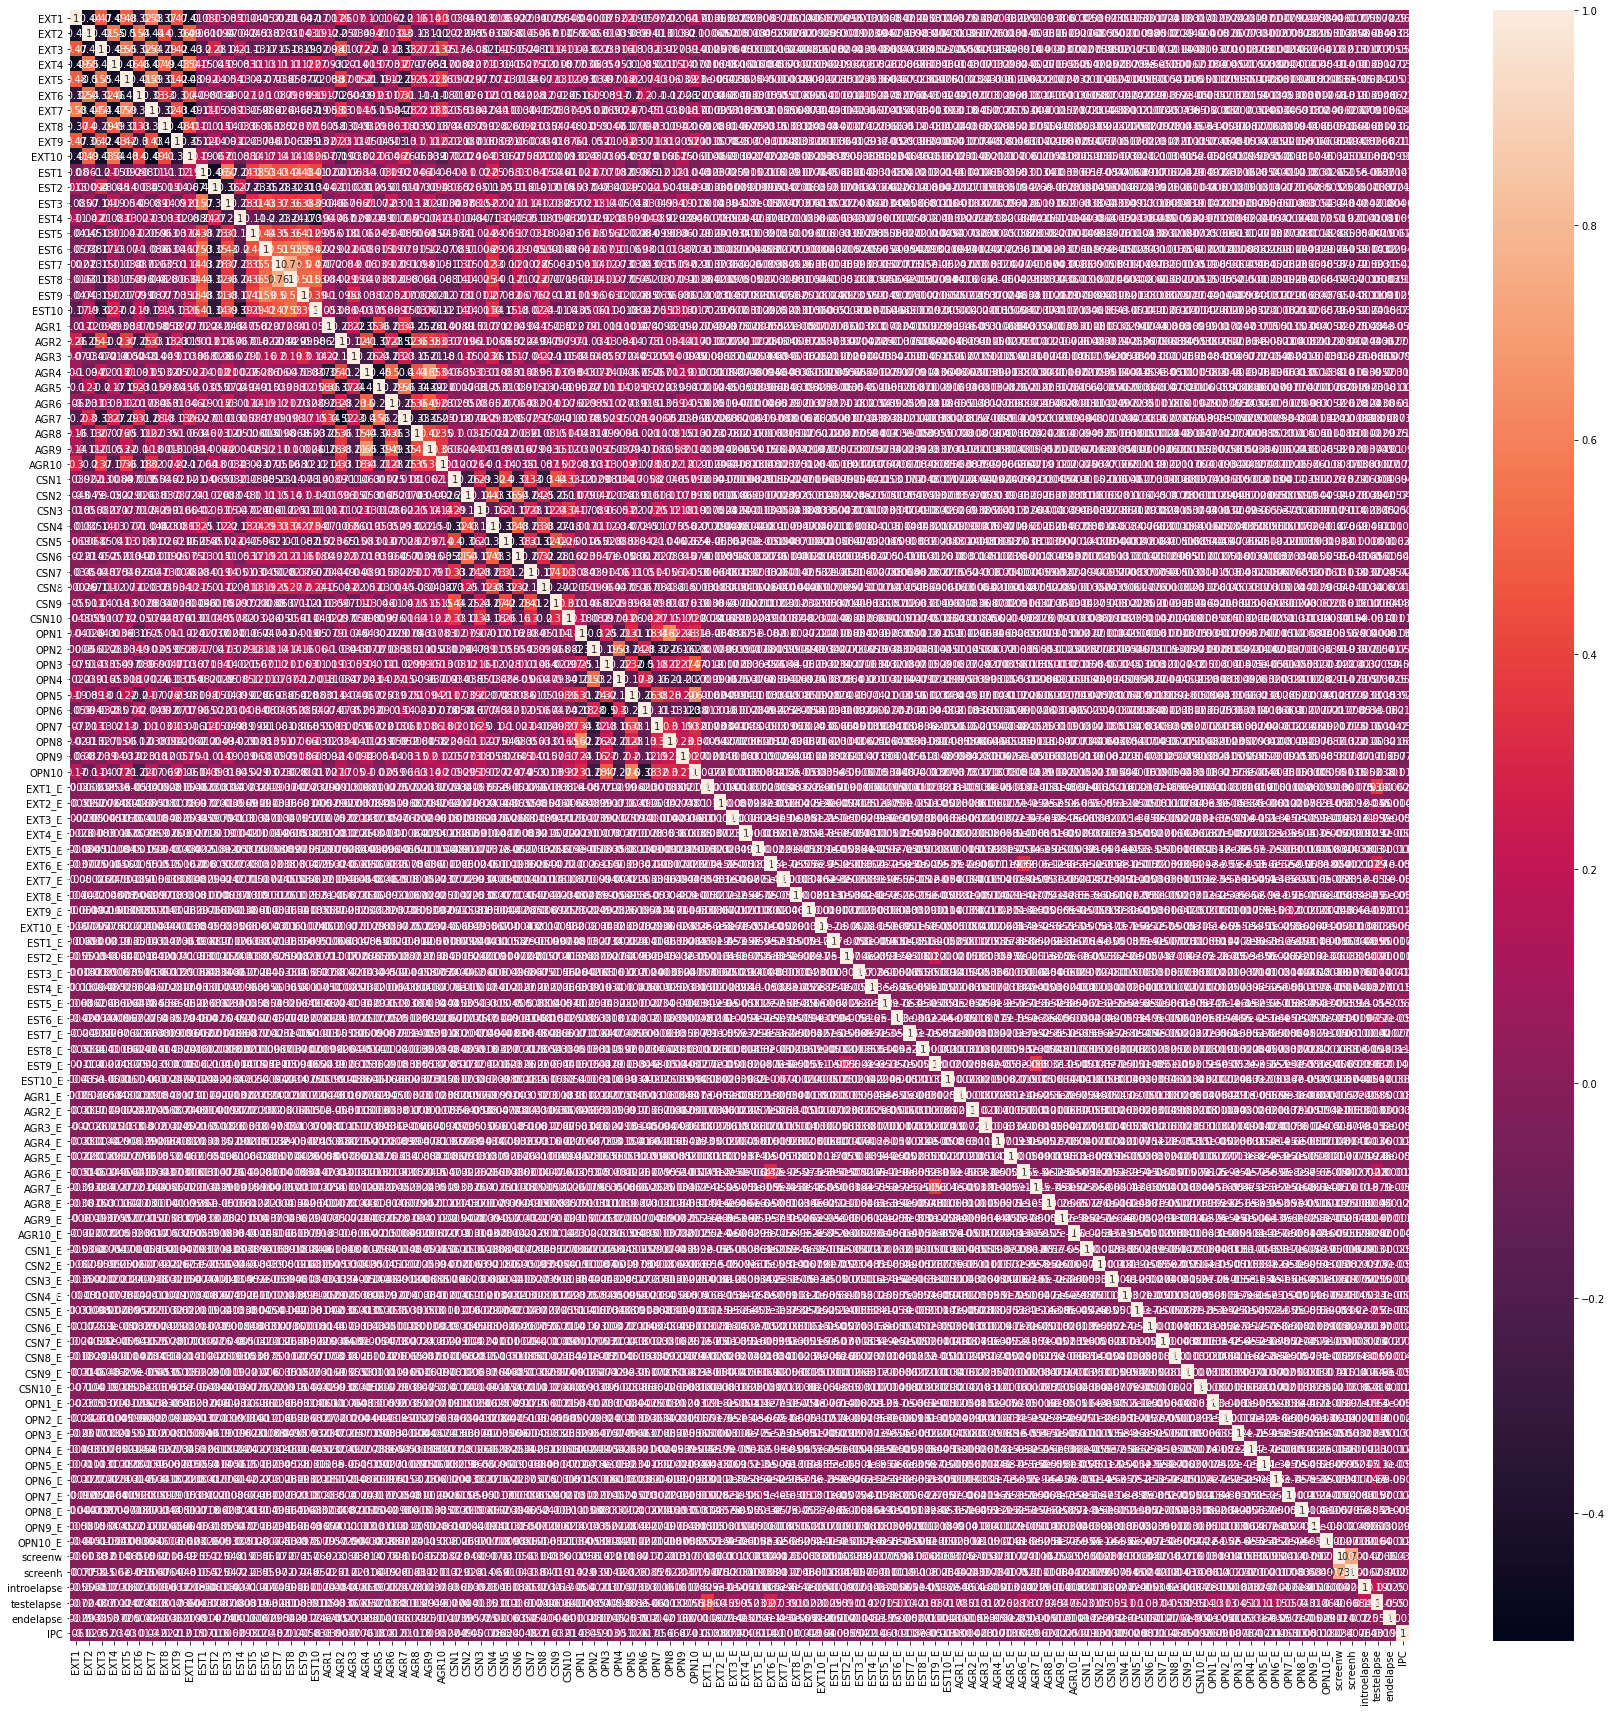

In [ ]:
plt.figure(figsize=(30.0, 30.0))
sns.heatmap(numeric_data.corr(), annot=True)

In [ ]:
traits_survey.columns[traits_survey.columns.get_loc('OPN10_E') + 1:]

Index(['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object')

In [ ]:
traits_survey['dateload'].value_counts()

2016-05-23 16:12:06    2
2018-09-20 11:10:30    2
2018-09-25 02:05:38    2
2018-05-07 09:17:24    2
2018-04-03 08:11:22    2
                      ..
2016-03-04 11:21:45    1
2016-12-07 08:01:54    1
2018-02-03 21:19:51    1
2017-03-27 06:32:55    1
2016-10-13 10:09:44    1
Name: dateload, Length: 79897, dtype: int64

In [ ]:
# dateload column will be dropped due to the timestamp does not represent a trivial feature for the outcome

In [ ]:
traits_survey.drop(columns=['dateload'], inplace=True)

466


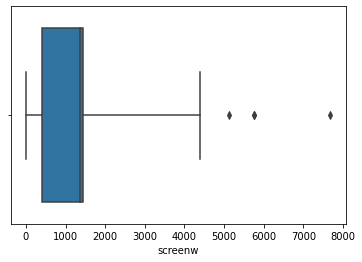

In [ ]:
print(len(traits_survey['screenw'].value_counts()))
sns.boxplot(traits_survey['screenw'], whis=3.5)

In [ ]:
# screenw and screenh will be dropped as well due to they are the width and height of the screen in pixels
# respectively where the survey was done

traits_survey.drop(columns=['screenw', 'screenh'], inplace=True)

In [ ]:
'''ctgr_cols_ind = np.where(traits_survey.dtypes != float)
traits_survey.columns[ctgr_cols_ind[0][0] : ctgr_cols_ind[0][0] + 3]'''

'ctgr_cols_ind = np.where(traits_survey.dtypes != float)\ntraits_survey.columns[ctgr_cols_ind[0][0] : ctgr_cols_ind[0][0] + 3]'

In [ ]:
cols_list = []
for ind in np.where(traits_survey.dtypes != float):
    cols_list.append(traits_survey.columns[ind])
ctgr_cols = cols_list[0]
ctgr_cols

Index(['country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], dtype='object')

US    42812
GB     5294
CA     4868
AU     3952
PH     1577
      ...  
LC        1
NC        1
SO        1
GI        1
AW        1
Name: country, Length: 171, dtype: int64


TypeError: ignored

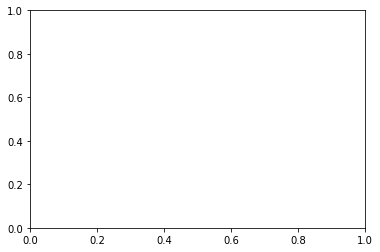

In [ ]:
print(traits_survey.country.value_counts())
sns.boxplot(traits_survey['country'])

In [ ]:
pd.DataFrame(traits_survey.isnull().sum()).reset_index()['index']

0                       EXT1
1                       EXT2
2                       EXT3
3                       EXT4
4                       EXT5
               ...          
102                endelapse
103                      IPC
104                  country
105     lat_appx_lots_of_err
106    long_appx_lots_of_err
Name: index, Length: 107, dtype: object

In [ ]:
traits_survey.dropna(inplace=True)
traits_survey.shape

(79728, 107)

## Data Preprocessing

In [ ]:
for ind in np.where(traits_survey.dtypes == object):
  
  print(traits_survey.columns[ind])

In [ ]:
ctgr_data = traits_survey[ctgr_cols]
ctgr_data

country lat_appx_lots_of_err long_appx_lots_of_err
0          US              34.2133               -118.88
1          AU             -37.8139              144.9634
2          RU              56.8619               35.8931
3          US              40.6944              -73.9906
4          US              37.4192             -122.0574
...       ...                  ...                   ...
79995      US                 38.0                 -97.0
79996      BR             -19.9167              -43.9333
79997      CA                 43.8              -79.4167
79998      US              33.7866             -118.2987
79999      GB                 51.5                 -0.13

[79728 rows x 3 columns]

In [ ]:
dummy_ctgr_data = pd.get_dummies(ctgr_data)
dummy_ctgr_data

country_AD  ...  long_appx_lots_of_err_NONE
0               0  ...                           0
1               0  ...                           0
2               0  ...                           0
3               0  ...                           0
4               0  ...                           0
...           ...  ...                         ...
79995           0  ...                           0
79996           0  ...                           0
79997           0  ...                           0
79998           0  ...                           0
79999           0  ...                           0

[79728 rows x 27309 columns]

In [ ]:
stand_data = pd.DataFrame(preprocessing.scale(numeric_data))
stand_data

0         1         2    ...       103       104       105
0      1.077047 -0.585998  0.587964  ... -0.058056 -0.020032 -0.212313
1      0.283530 -1.341921  0.587964  ... -0.052828 -0.019646  1.500940
2      1.077047 -1.341921  1.412799  ... -0.043865 -0.019768 -0.237508
3      1.077047  0.169926 -0.236871  ... -0.056413 -0.020032 -0.237508
4      0.283530  0.169926 -0.236871  ... -0.014139 -0.019036  3.012635
...         ...       ...       ...  ...       ...       ...       ...
79995  0.283530  0.169926  0.587964  ... -0.058505 -0.020073 -0.237508
79996  0.283530 -0.585998  1.412799  ... -0.054621 -0.019869 -0.237508
79997 -0.509986  0.925850 -1.061707  ... -0.054471 -0.019910 -0.237508
79998 -0.509986  0.169926  1.412799  ... -0.014139 -0.019849 -0.237508
79999  0.283530  0.925850 -1.061707  ... -0.028778 -0.019890 -0.237508

[80000 rows x 106 columns]

In [ ]:
X = pd.concat([stand_data, ctgr_data], axis=1)
X.head()

0         1  ...  lat_appx_lots_of_err  long_appx_lots_of_err
0  1.077047 -0.585998  ...               34.2133                -118.88
1  0.283530 -1.341921  ...              -37.8139               144.9634
2  1.077047 -1.341921  ...               56.8619                35.8931
3  1.077047  0.169926  ...               40.6944               -73.9906
4  0.283530  0.169926  ...               37.4192              -122.0574

[5 rows x 109 columns]

## K-Means Clustering

In [ ]:
model = KMeans(n_clusters=2, init='random')
clusters = model.fit(X)

ValueError: ignored

In [ ]:
X.head()

In [ ]:
cluster_numbers = clusters.predict(X)
cluster_numbers

In [ ]:
traits_survey['Cluster'] = cluster_numbers
traits_survey['Cluster'].value_counts()

In [ ]:
traits_survey[traits_survey['Cluster'] == 1].head()

In [ ]:
def clust_scatterplot(df, x, y, hue):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=hue)

In [28]:
# An average of each set of questions will be done for 
# representing every 'Big Five Personality Trait'


def recurs(trait, n=10):
  if n == 1:
    return traits_survey[trait + '1']
  else:
    return traits_survey[trait + str(n)] + recurs(trait, n-1)


for trait in ['EXT', 'EST', 'AGR', 'CSN', 'OPN']:
    traits_survey[trait + '_m'] = recurs(trait)/10

In [ ]:
clust_scatterplot(traits_survey, 'EXT_m', 'OPN_m', cluster_numbers)

### Determining optimal number of clusters

In [ ]:
X1 = pd.concat([stand_data, ctgr_data], axis=1)
clusters1 = KMeans(n_clusters=2, n_init=10, init="random").fit(X1)

In [ ]:
clusters1.inertia_

In [ ]:
results = []
for i in range(1,10):
    Xn = pd.concat([stand_data, ctgr_data], axis=1)
    clustersn = KMeans(n_clusters=i, n_init=10, init="random").fit(Xn)
    results.append({"n": i, "inertia": clustersn.inertia_})
elbow_plot = pd.DataFrame(results)

In [ ]:
elbow_plot

In [ ]:
results

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=elbow_plot, x="n", y="inertia")
plt.title("Optimal Number of Clusters")

In [ ]:
def plot_elbow(df, dims):
    results = []
    for i in range(1,10):
        Xn = df[dims]
        clustersn = KMeans(n_clusters=i, n_init=10, init="random").fit(Xn)
        results.append({"n": i+1, "inertia": clustersn.inertia_})
    elbow_plot = pd.DataFrame(results)
    
    plt.figure(figsize=(12,8))
    sns.lineplot(data=elbow_plot, x="n", y="inertia")
    plt.title("Optimal Number of Clusters")

In [ ]:
plot_elbow(df, ['EXT_m', 'EST_m', 'CSN_m', 'AGR_m', 'OPN_m'])

In [ ]:
def cluster_2d(df, x, y, n_clusters):
    X_n = df[[x, y]]
    clusters = KMeans(n_clusters=n_clusters, n_init=10, init="random").fit(X_n)
    clust_scatterplot(df, x, y, clusters.predict(X_n))

In [ ]:
cluster_2d(traits_survey, 'EXT_m', 'OPN_m', 4)